In [115]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [128]:
from utils import data

ImportError: cannot import name 'data' from 'utils' (/hdd/projects/swatchbook/ai/visualsearch/utils.py)

In [124]:
from core import utils

In [126]:
utils.get_image_features()

AttributeError: module 'core.utils' has no attribute 'get_image_features'

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import pickle

image_dir = '../../all'
features_dir = 'all_features'

Using TensorFlow backend.


In [120]:
all_features_matrix, image_names = load_data()

In [60]:
# from sklearn.manifold import TSNE
# tsne = TSNE()
# tsne_embeds = tsne.fit_transform(all_features)

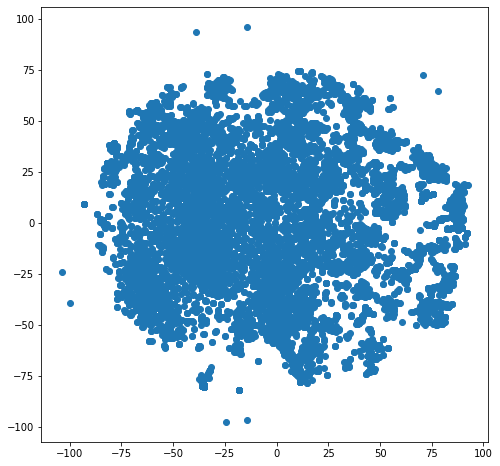

<Figure size 432x288 with 0 Axes>

In [63]:
# plt.figure(figsize=(8, 8))
# ax = plt.subplot()
# sc = ax.scatter(tsne_embeds[:,0], tsne_embeds[:,1])
# plt.show()
# plt.savefig('tsnee')

In [98]:
def get_features(image_path):
    vgg = VGG16()
    vgg.layers.pop()
    vgg = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    plt.imshow(image_array/255.)
    image_array = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))
    image_array = preprocess_input(image_array)
    image_features = model.predict(image_array)
    return image_features

In [107]:
# test_image_path = os.path.join(image_dir, '00fVukDPwec6FEHsa1H04t2BndO3BDpRSkBF3SfI.png')
test_image_path = '1.jpg'

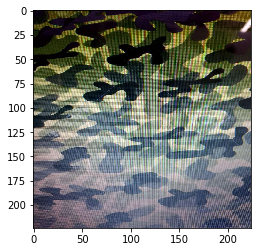

In [108]:
test_features = get_features(test_image_path, vgg)

In [6]:
def check_ext(path):
    ext=''
    if os.path.isfile(os.path.join(path+'.jpeg')):
        ext='.jpeg'
    elif os.path.isfile(os.path.join(path+'.png')):
        ext='.png'
    elif os.path.isfile(os.path.join(path+'.jpg')):
        ext='.jpg'
    else:
        raise Exception("No such file.")
    return ext
                


def plot_similar_images(ids, image_names, image_dir):
    N = (len(ids)+1)//2 
    figure, axes = plt.subplots(N, 2)
    i=0
    for n in range(N):
        for m in range(2):
            if n==N-1 and m==1:
                break
            path=os.path.join(image_dir, image_names[ids[i]])
            ext=check_ext(path)
            similar = load_img(path+ext, target_size=(224, 224))
            similar_array = img_to_array(similar)
            axes[n,m].imshow(similar_array/255.)
            i+=1 
    if len(ids)%2!=0:
        figure.delaxes(axes[n,m])
    else:
        path=os.path.join(image_dir, image_names[ids[i]])
        ext=check_ext(path)
        similar = load_img(path+ext, target_size=(224, 224))
        similar_array = img_to_array(similar)
        axes[n,m].imshow(similar_array/255.)


In [7]:
import faiss

In [24]:
index = faiss.IndexFlatL2(4096)

In [25]:
index.is_trained

True

In [26]:
index.add(all_features_matrix)

In [21]:
all_features_matrix[0]

array([0.8826839 , 1.4930733 , 0.11287361, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [207]:
D, I = index.search(all_features_matrix[2813:2814], 5)

In [23]:
all_features_matrix[2813:2814].shape

(1, 4096)

In [184]:
I

array([[   10,  2465,  7170, 10031,  1852]])

In [185]:
D

array([[   0.     ,  774.9568 ,  833.55615, 1016.13434, 1017.02295]],
      dtype=float32)

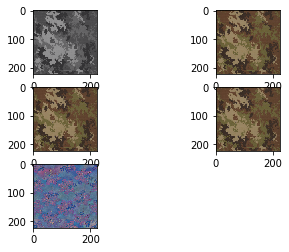

In [208]:
plot_similar_images(I.flatten(), image_names, image_dir)

In [109]:
D, I = index.search(test_features, 5)

In [102]:
print(I)

[[8430 2833 4488 9064 4083]]


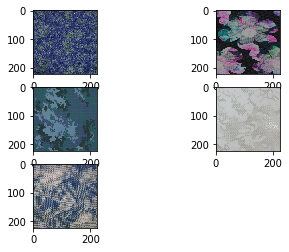

In [110]:
plot_similar_images(I.flatten(), image_names, image_dir)